<a href="https://colab.research.google.com/github/jeraldflowers/decision-tree-and-random-forest-fundamentals/blob/main/decision_tree_random_forest_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Decision Tree and Random Forest with scikit-learn

In [11]:
#Import the main libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

 We will use the **Car Evaluation Data Set** of Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [2]:
#We load dataset to use
df_car = pd.read_csv("/content/car_evaluation.csv", header=None)

## Exploratory Data Analysis

In [3]:
#Visualization of dataframe
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
#We analyze the shape of the object
print(df_car.shape)

(1728, 7)


In [5]:
#As we can see we are going to rename the columns correctly
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

In [6]:
#Let's verify the transformation
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
#We visualize the types of data
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

First summary of the data:
* There are 7 variables in the data set. All variables are of categorical data type.
* These are given for purchase, maintenance, doors, people, lug_boot, security, and class
* The class is the destiny variable or target.

In [8]:
# Let's explore the target variable a bit more.
df_car['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
# Let's verify the missings values.
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Data Processing

In [10]:
# We separate into X and y
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [12]:
#Import the necessary libraries for the creation od the model
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
#Let's see what we got
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [14]:
y_train.shape, y_test.shape

((1209,), (519,))

In [15]:
# Let's see what we got. For instance, in X_train
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [16]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Classification model training with decision tree

In [17]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
#Important: All our data types are object, we perform a transformation
import category_encoders as ce #pip install category-encoders

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [19]:
# Let's verify the transformation
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [20]:
#Import the decision tree
from sklearn.tree import DecisionTreeClassifier

#Creation of the model
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

In [21]:
#Training
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [22]:
#Calculation of the predictions in Train and Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [23]:
y_train_pred_tree

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

## Test of clasification model with decision tree.

In [24]:
#Calculation of metrics 
from sklearn.metrics import accuracy_score

#Calculation of accuracy in Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calcultion of accuracy in Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("The accuracy in train is:", train_accuracy_tree)
print("The accuracy in test is:", test_accuracy_tree)

The accuracy in train is: 0.7733664185277088
The accuracy in test is: 0.7591522157996147


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


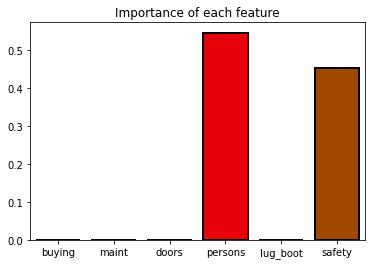

In [25]:
#Let's verify the feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title("Importance of each feature")
plt.show()

In [26]:
columns_to_drop = ['buying', 'maint', 'doors', 'lug_boot']
df_car.drop(columns_to_drop, axis="columns", inplace=True)

In [27]:
#Let's separate in X and y
X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
#We will do the evaluation again but this time using only persons and safety
encoder = ce.OrdinalEncoder(cols=['persons', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [30]:
#Import the desicion tree 
from sklearn.tree import DecisionTreeClassifier

#Creation of the model
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [31]:
#Training 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [32]:
#Calculation of the predictions in Train and Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [33]:
#Calculation of metrics 
from sklearn.metrics import accuracy_score

#Calculation of accuracy in Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculation of accuracy in Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("The accuracy in train is:", train_accuracy_tree)
print("The accuracy in test is:", test_accuracy_tree)

The accuracy in train is: 0.7733664185277088
The accuracy in test is: 0.7591522157996147


## Trainnig of clasification model with random forest

In [34]:
df_car_rf = pd.read_csv("/content/car_evaluation.csv", header=None)

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car_rf.columns = col_names

X = df_car_rf.drop(['class'], axis=1)
y = df_car_rf['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [35]:
#Import random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [36]:
#Calculation of the predictions in Train and Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Test of classification model with  random forest

In [37]:
#Calculation of metrics 
from sklearn.metrics import accuracy_score

#Calculation of accuracy in Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

#Calculation of accuracy in Test
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("The accuracy in train is:", train_accuracy_rf)
print("The accuracy in test is:", test_accuracy_rf)

#Important: We could reduce the number of estimators to para decrease the model overfitting

The accuracy in train is: 0.9942100909842845
The accuracy in test is: 0.8863198458574181


In [38]:
# Visualization of the important feature 
features_score = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_score

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

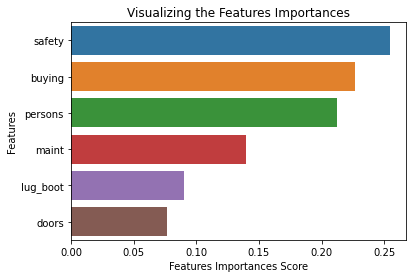

In [39]:
#Barplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_score, y=features_score.index)
plt.xlabel("Features Importances Score")
plt.ylabel("Features")
plt.title("Visualizing the Features Importances")
plt.show()

In [40]:
# Confusion Matrix of Random Forest
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)

print("Confusion Matrix\n\n", cm)

Confusion Matrix

 [[ 94   4  19   1]
 [ 11   7   0   1]
 [ 10   0 348   0]
 [ 12   1   0  11]]


In [41]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

